# Amazon Fine Food Reviews Analysis - NLP

# 3 Exploratory Data Analysis

## 3.1 Contents

## 3.2 Introduction

The goal of this project is to analyze customer reviews to understand these sentiments and identify key factors contributing to customer satisfaction and dissatisfaction. By leveraging natural language processing (NLP) techniques, businesses can gain actionable insights to improve product offerings and customer service.

## 3.3 Imports

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3
import nltk

## 3.4 Load The Data

In [2]:
con = sqlite3.connect('AmazonReviews_NLP\database.sqlite')

In [36]:
amazon_data = pd.read_sql_query(""" SELECT * FROM Reviews""", con)
amazon_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [39]:
# Check the shape of the DataFrame
print(amazon_data.shape)

(568454, 10)


In [40]:
# Summary of the DataFrame
print(amazon_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


## 3.5 Explore The Data

### 3.5.1 ProductId

In [41]:
amazon_data.ProductId.value_counts(ascending=False)

B007JFMH8M    913
B0026RQTGE    632
B002QWHJOU    632
B002QWP89S    632
B002QWP8H0    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64

In [43]:
amazon_data[amazon_data['ProductId'] == 'B007JFMH8M'].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
562970,562971,B007JFMH8M,A368Z46FIKHSEZ,"jaimoi ""Appreciator of good music""",0,0,5,1343433600,Delicious!,I love these cookies! Not only are they healt...
562971,562972,B007JFMH8M,A1JAPP1CXRG57A,"Linda Painchaud-Steinman ""PARK EDGE BOOKS""",0,0,5,1343433600,Great Anytime of Day!,Quaker Soft Baked Oatmeal Cookies with raisins...
562972,562973,B007JFMH8M,A2Z9JNXPIEL2B9,carwash169,0,0,5,1343433600,Very good!,I am usually not a huge fan of oatmeal cookies...
562973,562974,B007JFMH8M,A31CYJQO3FL586,"P. Titus ""Knitgirlll""",0,0,5,1343433600,Quaker Oats Oatmeal Raisin Mom Voxbox Review C...,I participated in a product review that includ...
562974,562975,B007JFMH8M,A2KXQ2EKFF3K2G,Jessica,0,0,5,1343433600,"Quick, simple HEALTHY snack for the kiddos!!!",My kids loved these. I was very pleased to giv...


In [52]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B007JFMH8M']['Score'].median()
print(median_score)

5.0


The most frequently purchased product associated with ' Baked Oatmeal Cookies' has achieved a median score of 5.

In [53]:
amazon_data[amazon_data['ProductId'] == 'B0026RQTGE'].head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
74631,74632,B0026RQTGE,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
74632,74633,B0026RQTGE,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
74633,74634,B0026RQTGE,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
74634,74635,B0026RQTGE,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
74635,74636,B0026RQTGE,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...


In [49]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B0026RQTGE']['Score'].median()
print(median_score)

5.0


The second most frequently purchased product associated with 'Greenies dog food' has achieved a median score of 5.

In [54]:
amazon_data[amazon_data['ProductId'] == 'B002QWHJOU'].head() 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
329412,329413,B002QWHJOU,A21U4DR8M6I9QN,"K. M Merrill ""justine""",1,1,5,1318896000,addictive! but works for night coughing in dogs,my 12 year old sheltie has chronic brochotitis...
329413,329414,B002QWHJOU,A17TDUBB4Z1PEC,jaded_green,1,1,5,1318550400,genuine Greenies best price,"These are genuine Greenies product, not a knoc..."
329414,329415,B002QWHJOU,ABQH3WAWMSMBH,tenisbrat87,1,1,5,1317168000,Perfect for our little doggies,"Our dogs love Greenies, but of course, which d..."
329415,329416,B002QWHJOU,AVTY5M74VA1BJ,tarotqueen,1,1,5,1316822400,dogs love greenies,"What can I say, dogs love greenies. They begg ..."
329416,329417,B002QWHJOU,A13TNN54ZEAUB1,dcz2221,1,1,5,1316736000,Greenies review,This review is for a box of Greenies Lite for ...


In [55]:
# Filtering the dataset for the specific ProductId and computing the median of the 'Score' column
median_score = amazon_data[amazon_data['ProductId'] == 'B002QWHJOU']['Score'].median()
print(median_score)

5.0


The third most frequently purchased product associated with 'Greenies dog food' has achieved a median score of 5.

## 3.5.2 Score

In [16]:
amazon_data.Score.value_counts(ascending=False)

5    3134
4     712
1     469
3     395
2     290
Name: Score, dtype: int64

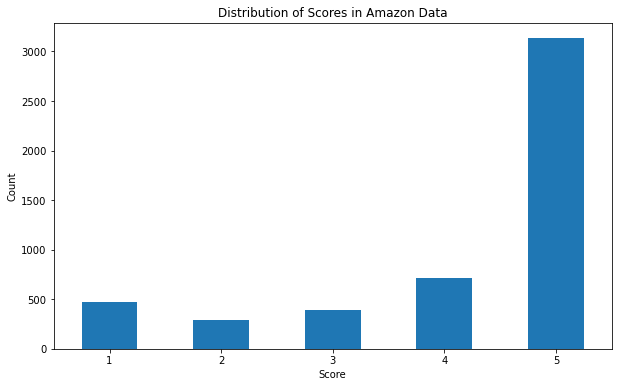

In [10]:
# Calculate the value counts for the 'Score' column
score_counts = amazon_data['Score'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
score_counts.plot(kind='bar')
plt.title('Distribution of Scores in Amazon Data')
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### 3.5.3 ProfileName

In [56]:
amazon_data.ProfileName.value_counts(ascending=False)

C. F. Hill "CFH"                               451
O. Brown "Ms. O. Khannah-Brown"                421
Gary Peterson                                  389
Rebecca of Amazon "The Rebecca Review"         365
Chris                                          363
                                              ... 
Steven Wolff                                     1
joycomeau                                        1
Lizz                                             1
Phyllis A. De Smet-Howard "tweedsmerewillo"      1
srfell17                                         1
Name: ProfileName, Length: 218418, dtype: int64

Here is the list of customers with the most reviews: C. F. Hill ("CFH"), O. Brown ("Ms. O. Khannah-Brown"), Gary Peterson, Rebecca of Amazon ("The Rebecca Review"), and Chris.

## 3.6 Missing Values

In [57]:
# Check for missing values
missing_values = amazon_data.isnull().sum()
print(missing_values)

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64


There are no missing values in the dataset.

## 3.7 Basic Text Statistics

In [58]:
# Calculate basic statistics for the 'Text' column
amazon_data['TextLength'] = amazon_data['Text'].apply(len)
amazon_data['WordCount'] = amazon_data['Text'].apply(lambda x: len(x.split()))

# Display basic statistics
print(amazon_data[['TextLength', 'WordCount']].describe())

          TextLength      WordCount
count  568454.000000  568454.000000
mean      436.222083      80.264023
std       445.339741      79.455384
min        12.000000       3.000000
25%       179.000000      33.000000
50%       302.000000      56.000000
75%       527.000000      98.000000
max     21409.000000    3432.000000


## 3.8 Word Cloud of Review Text

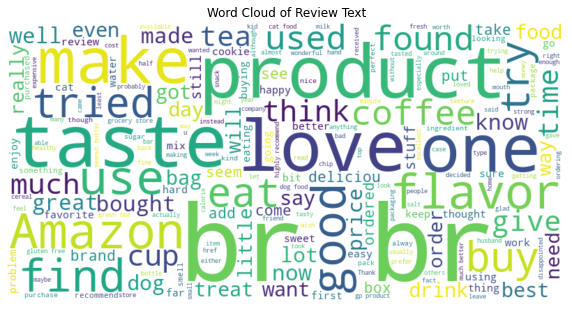

In [60]:
from wordcloud import WordCloud

# Combine all review texts
text_combined = ' '.join(amazon_data['Text'].astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plotting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Text')
plt.show()

The word cloud generated from Amazon product reviews highlights key themes and sentiments expressed by customers. Prominent words like "product", "taste", "love", "make", and "buy" indicate a focus on product quality, particularly in terms of taste and flavor. The frequent appearance of positive terms such as "good", "great", and "best" reflects overall customer satisfaction. Additionally, the mention of specific products like "tea", "coffee", and "dog" suggests these categories are commonly reviewed. The word cloud provides valuable insights into customer priorities and sentiments, useful for product improvement and targeted marketing strategies.

## 3.9 Most Common Words

In [ ]:
from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    text = re.sub(r'\W+', ' ', text.lower())
    tokens = text.split()
    return tokens

# Tokenize all reviews and count words
all_tokens = amazon_data['Text'].apply(clean_tokenize).sum()
word_freq = Counter(all_tokens)

# Display the most common words
print(word_freq.most_common(20))

## 3.10 Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
amazon_data['Sentiment'] = amazon_data['Text'].apply(get_sentiment)

# Plotting sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(amazon_data['Sentiment'], bins=50, kde=True)
plt.title('Distribution of Sentiment Polarity in Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

## 3.11 Analysis of Review Length and Score

In [ ]:
# Plotting review length vs. score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='TextLength', data=amazon_data, palette='viridis')
plt.title('Review Length by Score')
plt.xlabel('Score')
plt.ylabel('Review Length')
plt.show()

## 3.12 N-grams Analysis

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get n-grams
def get_ngrams(text, n=None):
    vectorizer = CountVectorizer(ngram_range=(n, n)).fit([text])
    return vectorizer.get_feature_names_out()

# Get bi-grams (2-grams)
bigrams = get_ngrams(text_combined, 2)
print(bigrams[:20])

# Get tri-grams (3-grams)
trigrams = get_ngrams(text_combined, 3)
print(trigrams[:20])

## 3.13 Summary